### Imports

In [2]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

### Loading Data

In [3]:
with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/train_set/x_train.pickle", "rb") as file:
    x_train = pickle.load(file)

with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/train_set/y_train.pickle", "rb") as file:
    y_train = pickle.load(file)

with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/internal_test_set/internal_x_test.pickle", "rb") as file:
    internal_x_test = pickle.load(file)

with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/internal_test_set/internal_y_test.pickle", "rb") as file:
    internal_y_test = pickle.load(file)

with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/external_test_set/external_x_test.pickle", "rb") as file:
    external_x_test = pickle.load(file)

with open("../../../../data/1_all_active_random_inactive/2DRDKit/for_ml/external_test_set/external_y_test.pickle", "rb") as file:
    external_y_test = pickle.load(file)

### Baseline Model

In [27]:
log_reg_params = [
    {
        "penalty": "l2",
        "C": 0.001
    },
    {
        "penalty": "l2",
        "C": 0.01
    },
    {
        "penalty": "l2",
        "C": 0.1
    },
    {
        "penalty": "l2",
        "C": 1
    },
    {
        "penalty": "l2",
        "C": 10
    },
    {
        "penalty": "l2",
        "C": 100
    },
    {
        "penalty": "l2",
        "C": 1000
    },
    {
        "penalty": "l1",
        "C": 0.001
    },
    {
        "penalty": "l1",
        "C": 0.01
    },
    {
        "penalty": "l1",
        "C": 0.1
    },
    {
        "penalty": "l1",
        "C": 1
    },
    {
        "penalty": "l1",
        "C": 10
    },
    {
        "penalty": "l1",
        "C": 100
    },
    {
        "penalty": "l1",
        "C": 1000
    }
]

In [28]:
with open("./training_testing_results3.csv", "w") as log_file:
    log_file.write("penalty,c,int_precision,int_recall,int_fbeta,ext_precision,ext_recall,ext_fbeta\n")
    for n, model_params in enumerate(log_reg_params):
        print(n)
        # log_file.write(f"Model {n}\n")
        # log_file.write(f"Penalty: {model_params["penalty"]}, C: {model_params["C"]}\n")
        log_file.write(f"{model_params['penalty']},{model_params['C']},")
        
        # first we create a model with one of the optimized parameter sets
        print("model fits")
        log_reg_model = LogisticRegression(penalty=model_params["penalty"],
                                           C=model_params["C"],
                                           random_state=42).fit(x_train, y_train)

        # then a model trained using these parameters is tested on the internal test set
        # I use the classes as predictions, because the confusion matrix is calculated like this
        # however, I think the production model should return probabilities
        model_predictions = log_reg_model.predict(internal_x_test)
        print("model predicted")

        # the values of the testing on the internal test set are then used to select the best model
        # ? which <average> to select?? 
        # selected micro, idk why
        precision, recall, fbeta, support = precision_recall_fscore_support(internal_y_test, model_predictions, average='micro')
        log_file.write(f"{precision},{recall},{fbeta},")
        
        print("int stats calculated")

        # then the model is tested on an external test set to assess its "real" performance
        model_predictions_for_external = log_reg_model.predict(external_x_test)
        ext_precision, ext_recall, ext_fbeta, ext_support = precision_recall_fscore_support(external_y_test, model_predictions_for_external, average='micro')
        print("ext stats calculated")
        log_file.write(f"{ext_precision},{ext_recall},{ext_fbeta}\n")

0
model fits
model predicted
int stats calculated
ext stats calculated
1
model fits
model predicted
int stats calculated
ext stats calculated
2
model fits
model predicted
int stats calculated
ext stats calculated
3
model fits
model predicted
int stats calculated
ext stats calculated
4
model fits
model predicted
int stats calculated
ext stats calculated
5
model fits
model predicted
int stats calculated
ext stats calculated
6
model fits
model predicted
int stats calculated
ext stats calculated
7
model fits
model predicted
int stats calculated
ext stats calculated
8
model fits
model predicted
int stats calculated
ext stats calculated
9
model fits
model predicted
int stats calculated
ext stats calculated
10
model fits
model predicted
int stats calculated
ext stats calculated
11
model fits


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

model predicted
int stats calculated
ext stats calculated
12
model fits
model predicted
int stats calculated
ext stats calculated
13
model fits
model predicted
int stats calculated
ext stats calculated


/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
best_logreg_model = LogisticRegression(penalty="l1", C=0.1)

In [35]:
best_logreg_model.fit(x_train, y_train)

/anaconda3/envs/chem/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

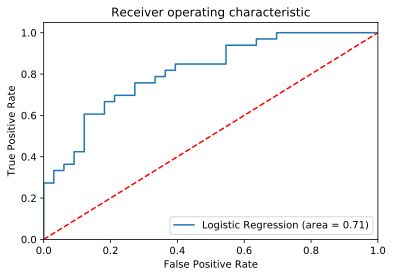

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(internal_y_test, best_logreg_model.predict(internal_x_test))
fpr, tpr, thresholds = roc_curve(internal_y_test, best_logreg_model.predict_proba(internal_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png', dpi=600)
plt.show()

In [40]:
with open("./2drdkit_random_366_logreg.pickle", "wb") as best_model_file:
    pickle.dump(best_logreg_model, best_model_file)

In [41]:
with open("./2drdkit_random_366_logreg.pickle", "rb") as test_file:
    test_file = pickle.load(test_file)